# <u>Linear Regression</u>
* Objective: Implement and understand simple & multiple linear regression.
* Tools: Scikit-learn, Pandas, Matplotlib

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Step - 1 : Load dataset** 

In [8]:
df = pd.read_csv("Housing.csv")  
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Step - 2 : Preprocess the Data**
* Basic info

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 40.5+ KB
None


* Encode 'yes'/'no' features

In [15]:
df_encoded = df.copy()
df_encoded.replace({'yes': 1, 'no': 0}, inplace=True)

<ipython-input-15-d23968762c19>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({'yes': 1, 'no': 0}, inplace=True)


* Convert 'mainroad', 'guestroom', etc., to binary if needed

In [16]:
categorical_cols = df_encoded.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

In [17]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


**Step 3: Train-Test Split**

In [19]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 4: Train Linear Regression Model**

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

**Step 5: Evaluate the Model**

In [23]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 970043.4039201635
Mean Squared Error (MSE): 1754318687330.6628
R² Score: 0.6529242642153186


**Step 6: Plot Regression Line (for simple linear regression)**

In [24]:
X_single = df_encoded[['area']]
y = df_encoded['price']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y, test_size=0.2, random_state=42)

In [25]:
model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)

LinearRegression()

* Plotting

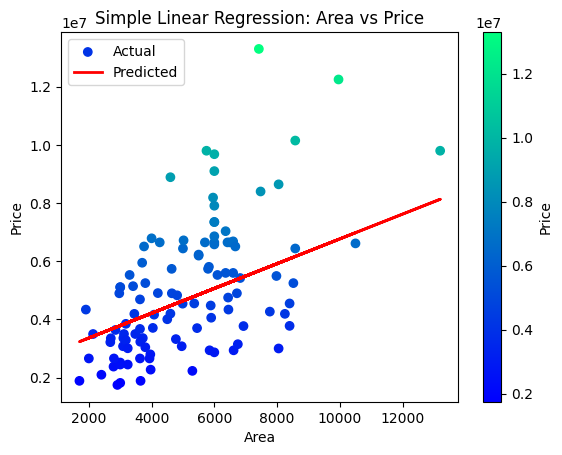

In [34]:
scatter = plt.scatter(X_test_s, y_test_s, c=y_test_s, cmap='winter', label='Actual')
plt.plot(X_test_s, model_s.predict(X_test_s), color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.colorbar(scatter, label='Price')
plt.legend()
plt.show()

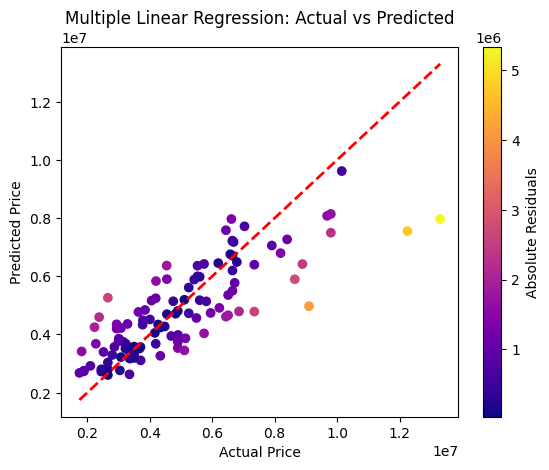

In [37]:
residuals = np.abs(y_test - y_pred)
plt.scatter(y_test, y_pred, c=residuals, cmap='plasma')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.colorbar(label='Absolute Residuals')  
plt.show()